<a href="https://colab.research.google.com/github/Mdanish2020/Yes_Bank_Stock_closing_Price_Prediction/blob/main/ML_Capstone_project(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month </b>

<b>"Trying to know our data because if you know your data then only you can implent your ideas and get insights from it"</b>

We understood our problem and what our objective is, in order to predict the stock's closing price of the month there are few things that'll be required or you can say that (mandatory) to perform regression analysis or building a better model which can easily and accurately predict our desired output.

So, to build a well performing model, we have divided our task into several steps:

<b>Univariate Analysis</b>:

<b>Bivariate Analysis</b>:

<b>Introducing hypothesis</b>:

In [269]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### <b> LET'S INVITE OUR DATASET</b>

In [270]:
#Import dataset
stock_df = pd.read_csv('/content/drive/MyDrive/Data/data_YesBank_StockPrices.csv')

In [271]:
#Reading first 5 rows of dataset
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [272]:
#get the number of rows and columns in the dataset 
stock_df.shape

(185, 5)

We have 185 instances in our dataset and 5 columns on which we are going to work on.

In [273]:
#Getting all info about our dataset
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Hurray! There is no null values in any instances.**

But **Date** have values in object data type. So, we need to convert it into proper date format.

In [274]:
#importing datetime
from datetime import datetime
stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [275]:
stock_df.head(3)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30


In [276]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [277]:
#Descriptive Statistics
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


As it is clearly shown in the descriptive statistics table, there is very high variation within features like **High**, **Low** and **Close**. 



In [278]:
#cheking is there any duplication in our data.
len(stock_df[stock_df.duplicated()])

0

There is no duplication in our data which is a good sign otherwise we have to deal with that too.

## <b> VISUALIZING THE DEPENDENT VARIABLE</B>

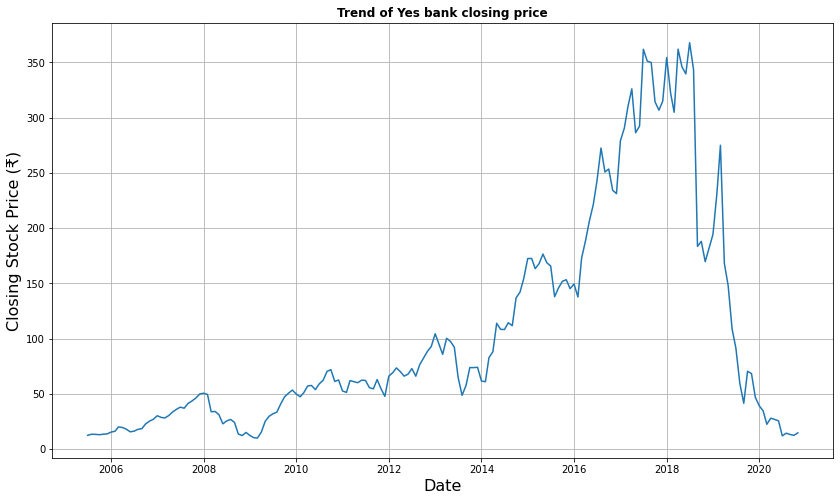

In [279]:
# trend of dependent variable 
plt.figure(figsize = (14,8))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold')
plt.plot(stock_df['Date'],stock_df['Close'])
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price (₹)',fontsize = 16)
plt.show()

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.

Text(0, 0.5, 'Density')

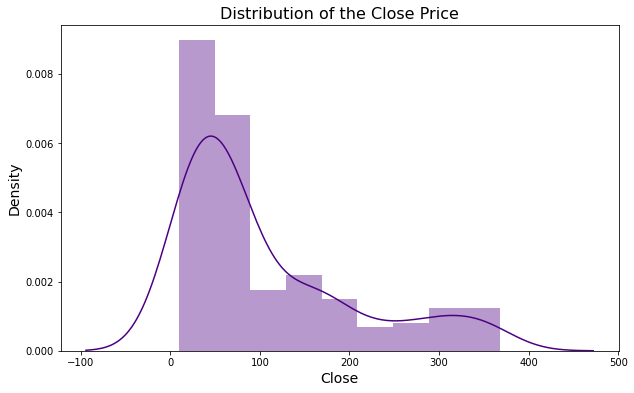

In [280]:
#Checking the distribution of our dependent variable 
plt.figure(figsize = (10,6))
sns.distplot(stock_df['Close'],color = 'indigo')
plt.title('Distribution of the Close Price',fontsize = 16)
plt.xlabel('Close',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

The distribution of Stock Closing Price is rightly skewed distribution. It may lead us to misleading results in view of statistical hyposthesis. It can be corrected by applying **Log Transformation** then we'll have a look how this data behave.

Text(0.5, 1.0, 'Distribution of the Close Price after log transformation')

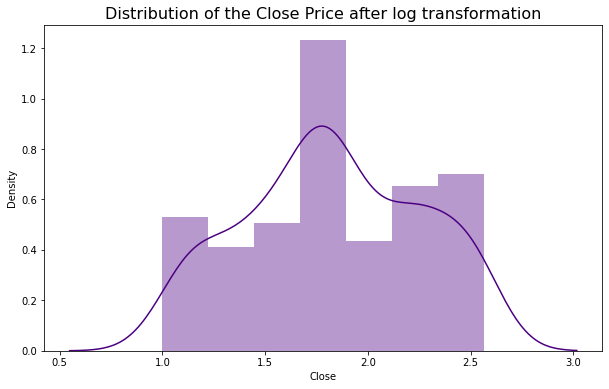

In [281]:
#Distribution after applying Log Transformation
plt.figure(figsize = (10,6))
sns.distplot(np.log10(stock_df['Close']),color = 'indigo')
plt.title('Distribution of the Close Price after log transformation',fontsize = 16)

In [282]:
features = ['Open','Low','High']

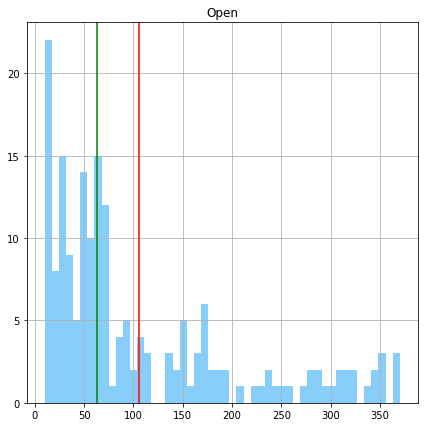

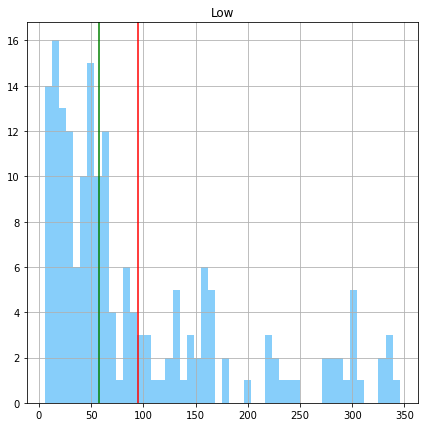

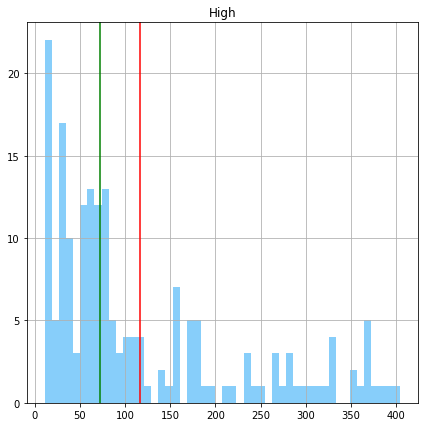

In [283]:
# tring to draw histogram for each variable 
for col in features:
  fig = plt.figure(figsize = (7,7))
  ax = fig.gca()
  ax.grid()
  plt.hist(stock_df[col],bins = 50, color = 'lightskyblue')
  ax.axvline(stock_df[col].mean(),color = 'r')
  ax.axvline(stock_df[col].median(),color = 'green')
  ax.set_title(col)
plt.show()

Most of the features are positively skewed here. So, again we have to apply log transformation on these features. Red line represent mean and green line represent median in the above graphs and it seems these graphs are not normally distributed.

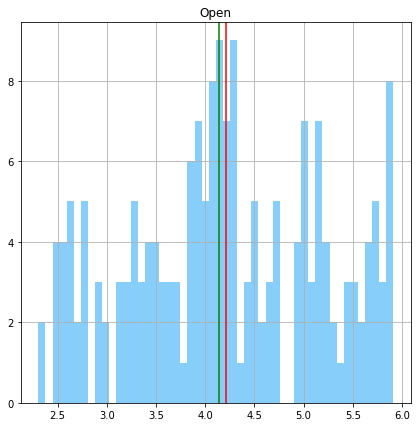

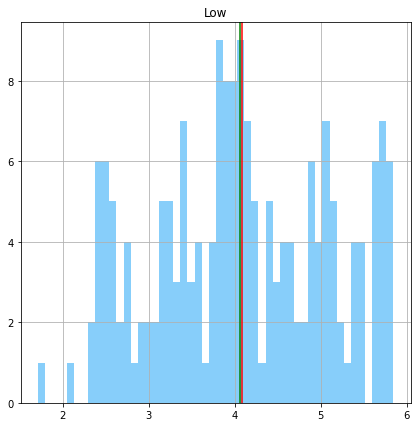

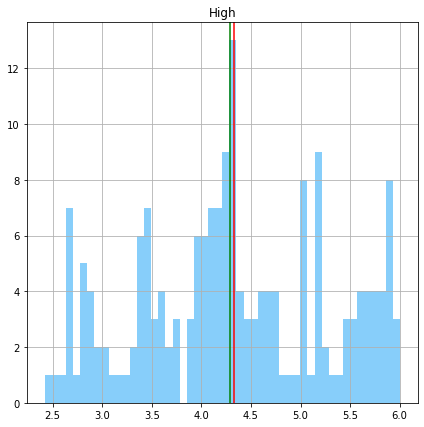

In [284]:
#to know the distribution of different features

for col in features:
  fig = plt.figure(figsize = (7,7))
  ax = fig.gca()
  ax.grid()
  log_df = np.log(stock_df[col])
  plt.hist(log_df,bins = 50, color = 'lightskyblue')
  ax.axvline(log_df.mean(),color = 'r')
  ax.axvline(log_df.median(),color = 'green')
  ax.set_title(col)
plt.show()

After **log transformation**, now it looks approximately normally distributed to me and if you'll observe statistically: mean and median are always close to each other.

## **BIVARIATE ANALYSIS**


Text(0.5, 1.0, 'Correlation map.')

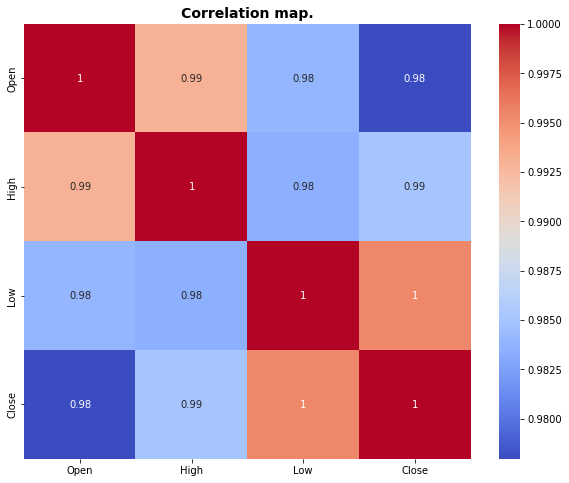

In [285]:
#  correlation map 
plt.figure(figsize = (10,8))
correlation = stock_df.corr()
sns.heatmap(abs(correlation),cmap = 'coolwarm',annot = True)
plt.title("Correlation map.",fontweight = 'bold',fontsize = 14)

In [286]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)

In [287]:
calc_vif(stock_df[[i for i in stock_df.describe().columns if i not in ['Date']]])

,Variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


In [288]:
stock_df_dup = stock_df.copy()

In [289]:
stock_df_dup['Average'] = (stock_df_dup['Low'] + stock_df_dup['High'])/2

In [290]:
#introducing new features of name year
stock_df_dup['Year'] = stock_df_dup['Date'].apply(lambda z: z.strftime('%Y'))

In [291]:
stock_df_dup['Month'] = stock_df_dup['Date'].apply(lambda y: y.strftime('%B'))

Text(0.5, 1.0, 'Correlation map.')

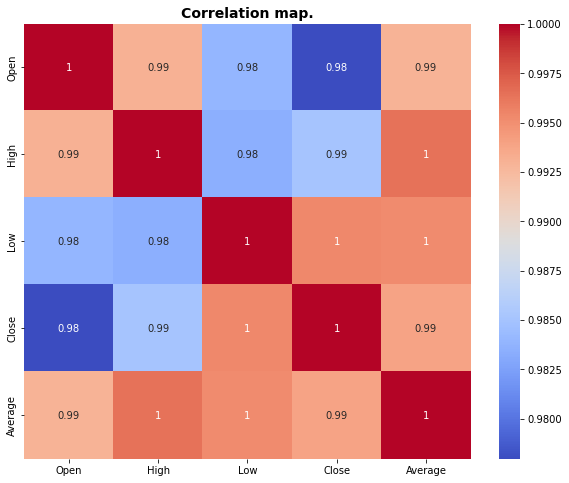

In [292]:
#  correlation map 
plt.figure(figsize = (10,8))
correlation = stock_df_dup.corr()
sns.heatmap(abs(correlation),cmap = 'coolwarm',annot = True)
plt.title("Correlation map.",fontweight = 'bold',fontsize = 14)

In [293]:
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,inf
2,Low,inf
3,Average,inf


In [294]:
#Calculating VIF after introducing some feature
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close','Average']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [295]:
calc_vif(stock_df_dup[[i for i in stock_df_dup.describe().columns if i not in ['Date','Close','Average','Open']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


Now we have VIF less than 5 which is good but we drop too many features which can lead to wrong prediction but first of all we'll train our model with these 2 features.

In [296]:
stock_df_dup.head(3)

,Date,Open,High,Low,Close,Average,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,12.625,2005,July
1,2005-08-01,12.58,14.88,12.55,13.42,13.715,2005,August
2,2005-09-01,13.48,14.87,12.27,13.30,13.570,2005,September


In [297]:
#introducing dummy variables
stock_df_dup = pd.get_dummies(stock_df_dup,columns = ['Month','Year'])

In [298]:
stock_df_dup.index = stock_df_dup['Date']
stock_df_dup.drop('Date',axis = 1,inplace = True)

In [299]:
stock_df_dup.head(3)

,Open,High,Low,Close,Average,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.625,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-08-01,12.58,14.88,12.55,13.42,13.715,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-09-01,13.48,14.87,12.27,13.30,13.570,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [300]:
total_features  = ['Low','Year_2005','Year_2006','Year_2007','Year_2008','Year_2009','Year_2010',
                   'Year_2011','Year_2012','Year_2013','Year_2014','Year_2015','Year_2016','Year_2017','Year_2018','Year_2019','Year_2020']

## **Linear Regression**

In [301]:
#Installing scipy 
!pip install scipy

In [302]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore
X = round(stock_df_dup[total_features].apply(zscore),3)


In [303]:
X.head()

,Low,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,
2005-07-01,-0.920,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-08-01,-0.906,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-09-01,-0.909,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-10-01,-0.907,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-11-01,-0.902,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251


In [304]:
#applying log on dependent variable 
y = np.log10(stock_df_dup['Close'])

In [305]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [306]:
#Split our data into train and test datasets 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 17)
X_test:  (37, 17)
y_train:  (148,)
y_test:  (37,)


In [307]:
# making dataframes of training and testing dataset
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)
train_df = pd.DataFrame(X_train,y_train)

In [308]:
#Applying Linear Regression 
lr = LinearRegression()
reg = lr.fit(X_train,y_train)

In [309]:
#Checking efficiency of training model
reg.score(X_train,y_train)

0.9403589632859228

In [310]:
#getting regression coefficients 
print('Intercept',reg.intercept_)
print('Regressors',reg.coef_)

Intercept -58875444889.93408
Regressors [3.05309444e-01 7.90575959e+12 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.09921214e+13 1.09921214e+13 1.09921214e+13 1.09921214e+13
 1.05553484e+13]


In [311]:
#Predict y_test on the basis of train sets
y_pred = reg.predict(X_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [1.41552734 2.13427734 1.83740234 2.10693359 1.79833984 1.53271484
 2.40771484 1.24365234 1.09521484 2.31005859 2.53662109 1.97802734
 2.16943359 1.71240234 2.67724609 2.47021484 1.82958984 1.40380859
 2.25146484 1.75927734 1.33740234 2.02099609 2.14990234 1.77880859
 2.34912109 1.79833984 2.45068359 1.09521484 2.00146484 1.69287109
 2.71630859 2.46630859 1.87646484 2.21240234 1.55615234 1.75146484
 2.49172211]


In [312]:
def evaluation_metrics(data):
  MSE = mean_squared_error(y_test,data)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(y_test,data)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(y_test,data))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  return

In [313]:
#getting our model accuracy
evaluation_metrics(y_pred)

Mean Squared Error:  0.008367958757531737
Root Mean Squared Error:  0.09147654758205372
R2:  0.9550791607186839
Adjusted R2:  0.9148868308354011


In [314]:
test_df["LR Predicted Price"] = 10**y_pred
test_df.head(3)

,Actual Closing Price,LR Predicted Price
Date,,
2008-04-01,34.06,26.033187
2015-12-01,145.23,136.231439
2019-12-01,46.95,68.770526


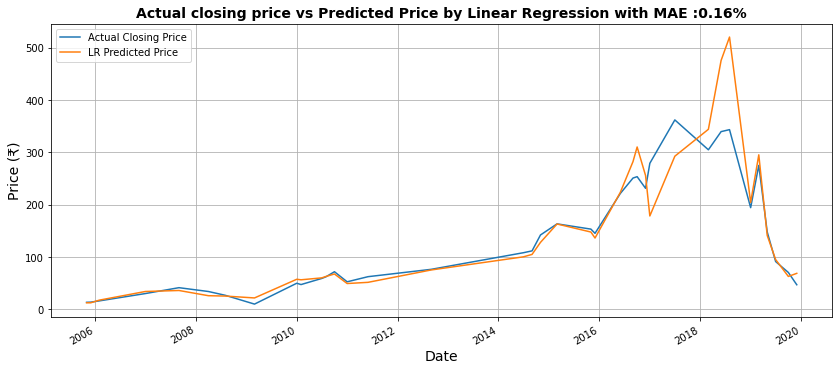

In [315]:
from sklearn.metrics import mean_absolute_percentage_error
MAE = mean_absolute_percentage_error
#Graph between Actual Close price and Predicted Price
test_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price by Linear Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

## **LASSO REGRESSION**

In [352]:
lasso  = Lasso(alpha=0.0001 , max_iter= 5000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=5000)

In [353]:
lasso.score(X_train, y_train)

0.9457772741406169

In [318]:
y_pred_L = lasso.predict(X_test)

### <b> Applying Cross Validation to train accurately because our dataset is too small, and to get the best α for Lasso we used Hyperparameter Tuning by <code>GridSearchCV()</code>.</b>  

In [319]:
# Cross Validation 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             scoring='neg_mean_squared_error')

In [320]:
print("Best fitted alpha value is :" ,lasso_regressor.best_params_)
print("\nBy Using ",lasso_regressor.best_params_, " Negative mean squared error : ", lasso_regressor.best_score_)

Best fitted alpha value is : {'alpha': 0.0014}

By Using  {'alpha': 0.0014}  Negative mean squared error :  -0.01263071552015855


In [321]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [322]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_lasso)

Mean Squared Error:  0.009376701436556797
Root Mean Squared Error:  0.09683336943717696
R2:  0.9496640327198869
Adjusted R2:  0.9046265883113646


In [323]:
# Introducing Data frame for Actual closing price and Lasso Predicted Closing Price 
test_df['Lasso Predicted Closing Price'] = 10**y_pred_lasso
lasso_df = test_df.loc[:,['Actual Closing Price','Lasso Predicted Closing Price']]
lasso_df.head(3)

,Actual Closing Price,Lasso Predicted Closing Price
Date,,
2008-04-01,34.06,26.365934
2015-12-01,145.23,144.313848
2019-12-01,46.95,59.849779


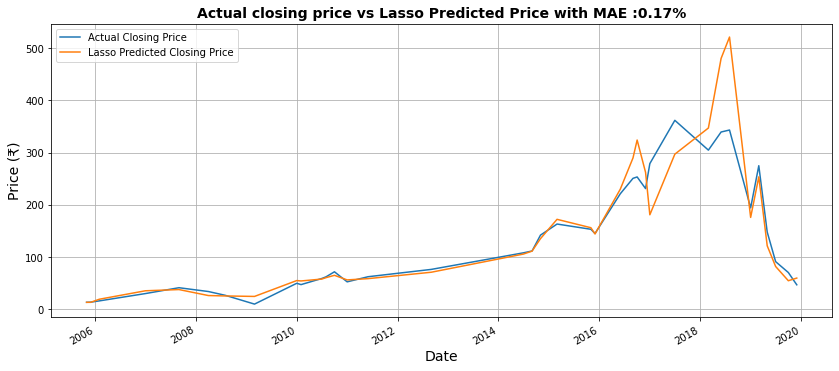

In [324]:
#Graph between Actual Close price and Lasso Predicted Price
lasso_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Lasso Predicted Price with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_lasso)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

## **Ridge Regression**

In [325]:
#fitting ridge regression
ridge = Ridge(alpha= 0.1, max_iter = 5000)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1, max_iter=5000)

In [326]:
ridge.score(X_train,y_train)

0.9457766805321504

In [327]:
y_pred_r = ridge.predict(X_test)

In [328]:
#getting error matrix
evaluation_metrics(y_pred_r)

Mean Squared Error:  0.009365359873489867
Root Mean Squared Error:  0.0967747894520565
R2:  0.9497249164487018
Adjusted R2:  0.9047419469554351


In [329]:
# Applying ridge regression to penalize our parameters
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [330]:
print("Best fitted alpha value is :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " Negative mean squared error: ", ridge_regressor.best_score_)

Best fitted alpha value is : {'alpha': 3}

Using  {'alpha': 3}  Negative mean squared error:  -0.012538304166010362


In [331]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [332]:
#Getting evaluation metrics for Ridge
evaluation_metrics(y_pred_ridge)

Mean Squared Error:  0.008847513525776934
Root Mean Squared Error:  0.09406122222136461
R2:  0.9525048169276678
Adjusted R2:  0.9100091268103179


In [333]:
#introducing dataframe for Ridge redicted price
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(3)

,Actual Closing Price,Ridge Predicted Closing Price
Date,,
2008-04-01,34.06,26.142190
2015-12-01,145.23,146.673951
2019-12-01,46.95,64.154295


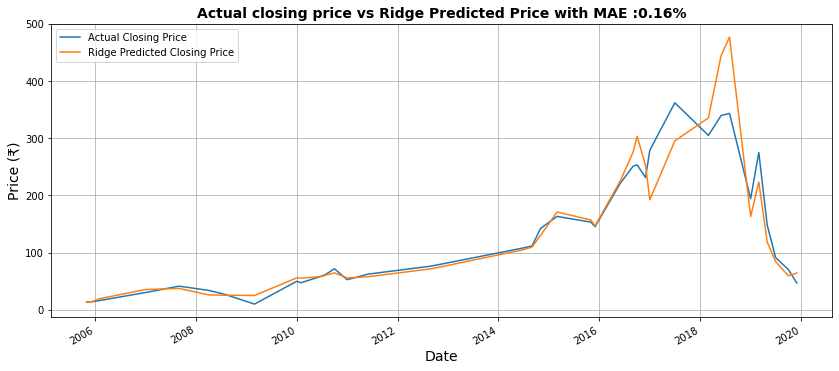

In [334]:
#Graph between Actual Close price and Ridge Predicted Price
ridge_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Ridge Predicted Price with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_ridge)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

## **ElasticNet Regression Model**

In [335]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [336]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [337]:
elasticnet.score(X_train, y_train)

0.8264020056976695

In [338]:
print('Intercept of Elastic Model: ',elasticnet.intercept_)
print('Regressors of Elastic Model:\n ',elasticnet.coef_)

Intercept of Elastic Model:  1.8229123183603404
Regressors of Elastic Model:
  [ 0.29700938 -0.02212586 -0.0330104  -0.         -0.00727482 -0.00181328
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.         -0.02971941]


In [339]:
y_pred_en = elasticnet.predict(X_test)

In [340]:
#getting evaluation metrics for Ridge
evaluation_metrics(y_pred_en)

Mean Squared Error:  0.030334217104865353
Root Mean Squared Error:  0.17416721018855802
R2:  0.8371599895774178
Adjusted R2:  0.6914610328835284


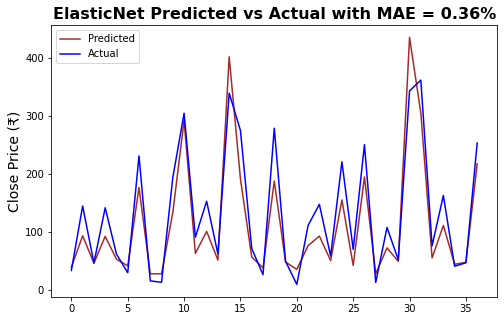

In [341]:
plt.figure(figsize=(8,5))
plt.plot(10**y_pred_en,color = 'brown')
plt.plot(np.array(10**y_test),color = 'blue')
plt.legend(["Predicted","Actual"])
plt.ylabel('Close Price (₹)',fontsize = 14)
plt.title('ElasticNet Predicted vs Actual with MAE = {:.2f}%'.format(MAE(10**y_test,10**y_pred_en)),fontweight = 'bold',fontsize = 16)
plt.show()

### <b>Applying Cross Validation and Hyperparameter Tuning in ElasticNet Regression Model

In [342]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [343]:
print("Best fitted alpha value is :" ,elastic_regressor.best_params_)
print("\nBy Using ",elastic_regressor.best_params_, " Negative mean squared error is: ", elastic_regressor.best_score_)

Best fitted alpha value is : {'alpha': 0.01, 'l1_ratio': 0.3}

By Using  {'alpha': 0.01, 'l1_ratio': 0.3}  Negative mean squared error is:  -0.01233335084816529


In [344]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [345]:
#Getting Evaluation metrics for ElasticNet after applying Cross-Validation
evaluation_metrics(y_pred_elastic)

Mean Squared Error:  0.009096377849834535
Root Mean Squared Error:  0.09537493302663198
R2:  0.9511688645612937
Adjusted R2:  0.9074778486424512


In [346]:
# Inroducing dataframe for Actual closing price and ElasticNet predicted Closing Price 
test_df['ENet Predicted Closing Price'] = 10**y_pred_elastic
Enet_df = test_df.loc[:,['Actual Closing Price','ENet Predicted Closing Price']]
Enet_df.head(3)

,Actual Closing Price,ENet Predicted Closing Price
Date,,
2008-04-01,34.06,26.763841
2015-12-01,145.23,142.542580
2019-12-01,46.95,59.677823


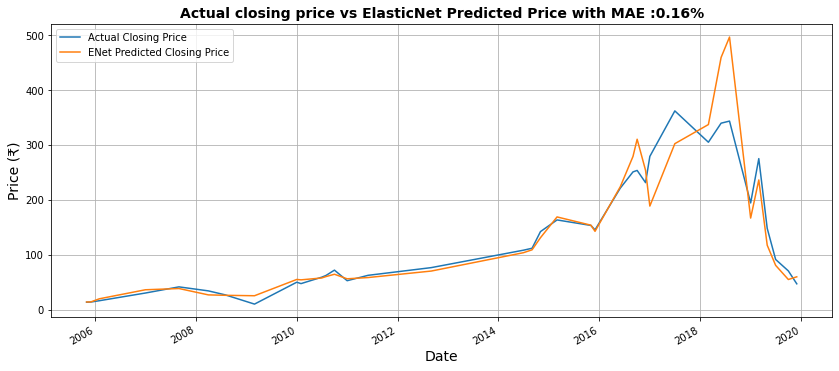

In [347]:
#Graph between Actual Close price and Elastic Predicted Price
Enet_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs ElasticNet Predicted Price with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_elastic)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

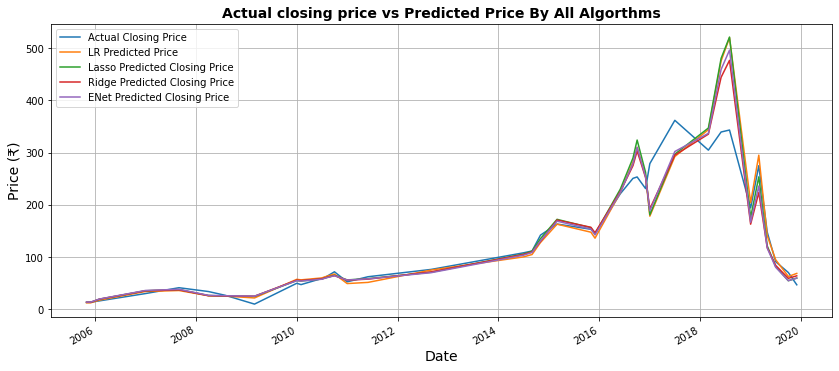

In [348]:
#Graph between Actual Close price and Predicted Price by All Algorithms.
test_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price By All Algorthms',fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

In [354]:
#Comparison between algorithms 
accuracy_list = ['MSE','RMSE',"R2","Adjusted_R2"]
reg_models = [reg,ridge,lasso,elasticnet]

def error_matrix(Y):
  MSE = mean_squared_error(y_test,Y)
  RMSE = np.sqrt(MSE)
  r_2 = r2_score(y_test,Y)
  adj_r2 = 1-(1-r2_score(y_test,Y))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))

  return MSE,RMSE,r_2,adj_r2

def training_accuracy(models):
  train_accuracy = []
  for model in reg_models:
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
  return train_accuracy



accuracy_df = pd.DataFrame(index = accuracy_list)
accuracy_df['Linear Regression'] = error_matrix(y_pred)
accuracy_df['Ridge'] = error_matrix(y_pred_ridge)
accuracy_df['Lasso'] = error_matrix(y_pred_lasso)
accuracy_df['ElasticNet'] = error_matrix(y_pred_elastic)
accuracy_df.loc['Training Accuracy'] = training_accuracy(reg_models)
accuracy_df

,Linear Regression,Ridge,Lasso,ElasticNet
MSE,0.008368,0.008848,0.009377,0.009096
RMSE,0.091477,0.094061,0.096833,0.095375
R2,0.955079,0.952505,0.949664,0.951169
Adjusted_R2,0.914887,0.910009,0.904627,0.907478
Training Accuracy,0.940359,0.945655,0.945777,0.826402


### <b> Conclusions</b>
* Target Variable is strongly dependent on Independent Variables.
* Dummy variables improved training accuracy, R2 and Adjusted R2 for all the models
* Linear Regression and Lasso are performing better than other models with training accuracy **94.0359%** and **94.45777%** respectively.
* Apart from Linear Regression and Lasso, Ridge and Elastic Net is also performing better but they have less training accuracy.
* Ridge and ElasticNet is performing far much better after Applying Hyperparameter Tuning and Cross validation.
* R2 and Adjusted R2 are around <b>95</b> and <b>91%</b> in each model.